## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [5]:
# answer goes here
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv')
raw_data


,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,0.367,0.2,1.1,0.217,1.3,3.0,0.423,0.396,0.5,0.6,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
2139,2016,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,0.529,0.0,0.1,0.100,3.2,5.8,0.539,0.530,2.4,3.2,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [9]:
# answer goes here
df = raw_data[raw_data['G'] >= 20]
df = df[df['MP'] >= 10]
df

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
7,2019,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2016,Metta World Peace,SF,36,LAL,35,5,16.9,1.6,5.1,0.311,0.7,2.4,0.310,0.8,2.7,0.312,0.384,1.1,1.6,0.702,0.5,2.0,2.5,0.8,0.6,0.3,0.4,1.9,5.0
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,0.339,1.4,4.4,0.325,0.9,2.5,0.363,0.442,1.2,1.4,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,0.514,0.1,0.4,0.233,6.7,12.8,0.523,0.518,1.4,2.2,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
2139,2016,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,0.529,0.0,0.1,0.100,3.2,5.8,0.539,0.530,2.4,3.2,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [12]:
# answer goes here
df = df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]
df

,PTS,TRB,AST,STL,BLK,TOV
0,5.3,1.5,0.6,0.5,0.2,0.5
2,3.2,1.8,1.9,0.4,0.1,0.8
3,13.9,9.5,1.6,1.5,1.0,1.7
4,8.9,7.3,2.2,0.9,0.8,1.5
7,21.3,9.2,2.4,0.5,1.3,1.8
...,...,...,...,...,...,...
2131,5.0,2.5,0.8,0.6,0.3,0.4
2137,7.3,1.8,0.6,0.4,0.1,0.6
2138,15.1,9.0,1.8,1.5,0.5,1.9
2139,8.7,6.2,1.0,0.8,0.9,0.9


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [29]:
# answer goes here

scale = StandardScaler()
x_scale = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
x_scale

,PTS,TRB,AST,STL,BLK,TOV
0,-0.841725,-1.116943,-0.892385,-0.598700,-0.61546,-1.040279
1,-1.213467,-0.991646,-0.171041,-0.851287,-0.84922,-0.649004
2,0.680646,2.224313,-0.337505,1.927166,1.25462,0.524821
3,-0.204454,1.305468,-0.004577,0.411646,0.78710,0.263971
4,1.990594,2.099016,0.106399,-0.598700,1.95590,0.655246
...,...,...,...,...,...,...
1583,-0.894831,-0.699286,-0.781409,-0.346114,-0.38170,-1.170704
1584,-0.487686,-0.991646,-0.892385,-0.851287,-0.84922,-0.909854
1585,0.893070,2.015485,-0.226529,1.927166,0.08582,0.785671
1586,-0.239858,0.846045,-0.670433,0.159060,1.02086,-0.518579


Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [30]:
# answer goes here
kmeans = KMeans(n_clusters=3)
pred = pd.DataFrame(kmeans.fit_predict(x_scale))

In [34]:
x_scale_inverse = pd.DataFrame(scale.inverse_transform(x), columns=x.columns)
x_scale_inverse

,PTS,TRB,AST,STL,BLK,TOV
0,5.3,1.5,0.6,0.5,0.2,0.5
1,3.2,1.8,1.9,0.4,0.1,0.8
2,13.9,9.5,1.6,1.5,1.0,1.7
3,8.9,7.3,2.2,0.9,0.8,1.5
4,21.3,9.2,2.4,0.5,1.3,1.8
...,...,...,...,...,...,...
1583,5.0,2.5,0.8,0.6,0.3,0.4
1584,7.3,1.8,0.6,0.4,0.1,0.6
1585,15.1,9.0,1.8,1.5,0.5,1.9
1586,8.7,6.2,1.0,0.8,0.9,0.9


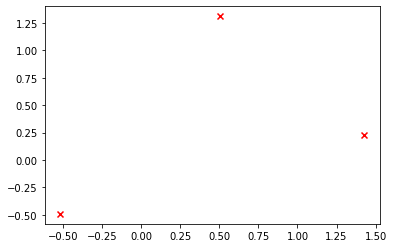

In [36]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

Experiment with different values of K. Do any further interesting archetypes come out?

In [ ]:
# answer goes here



